In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import math
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.style.use('ggplot')
sns.set_context(context='notebook')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
btc = pd.read_csv('BTC_pro.csv',index_col=0)

In [3]:
btc.head()

,Open,High,Low,Close,Volume,Market Cap,Return,Trend,Cum_Return
Date,,,,,,,,,
2013-04-29,134.44,147.49,134.00,144.54,0,1603768865,0.076969,1,0.076969
2013-04-30,144.00,146.93,134.05,139.00,0,1542813125,-0.038328,0,0.035690
2013-05-01,139.00,139.89,107.72,116.99,0,1298954594,-0.158345,0,-0.128306
2013-05-02,116.38,125.60,92.28,105.21,0,1168517495,-0.100692,0,-0.216079
2013-05-03,106.25,108.13,79.10,97.75,0,1085995169,-0.070906,0,-0.271664


In [4]:
btc.tail()

,Open,High,Low,Close,Volume,Market Cap,Return,Trend,Cum_Return
Date,,,,,,,,,
2021-08-11,45599.70,46735.63,45351.71,45593.64,34319709073,856398622622,0.000189,1,338.718650
2021-08-12,45576.88,46228.91,43861.45,44428.29,33723620826,834546790666,-0.025559,0,330.035616
2021-08-13,44439.69,47831.98,44282.42,47793.32,31744259539,897802604441,0.075741,1,355.108487
2021-08-14,47810.69,48098.68,46177.63,47096.95,31211354442,884769956069,-0.014570,0,349.919827
2021-08-15,47096.67,47357.11,45579.59,47047.00,30988958446,883882942188,-0.001061,0,349.547649


In [5]:
#Cum_return = (1 + btc['Return']).cumprod() - 1

In [6]:
#btc['Cum_Return'] = Cum_return

In [7]:
btc.head(10)

,Open,High,Low,Close,Volume,Market Cap,Return,Trend,Cum_Return
Date,,,,,,,,,
2013-04-29,134.44,147.49,134.00,144.54,0,1603768865,0.076969,1,0.076969
2013-04-30,144.00,146.93,134.05,139.00,0,1542813125,-0.038328,0,0.035690
2013-05-01,139.00,139.89,107.72,116.99,0,1298954594,-0.158345,0,-0.128306
2013-05-02,116.38,125.60,92.28,105.21,0,1168517495,-0.100692,0,-0.216079
2013-05-03,106.25,108.13,79.10,97.75,0,1085995169,-0.070906,0,-0.271664
2013-05-04,98.10,115.00,92.50,112.50,0,1250316563,0.150895,1,-0.161761
2013-05-05,112.90,118.80,107.14,115.91,0,1288693176,0.030311,1,-0.136353
2013-05-06,115.98,124.66,106.64,112.30,0,1249023060,-0.031145,0,-0.163252
2013-05-07,112.25,113.44,97.70,111.50,0,1240593600,-0.007124,0,-0.169212


In [8]:
feature_descriptions={
        'Open': 'Opening Price',
        'Close': 'Closing Price',
        'Low': 'Lowest Price',
        'High': 'Highest Price',
        'Volume': 'A measure of how much of a cryptocurrency was traded in the last 24 hours',
        'Market Cap': "The total market value of a cryptocurrency's circulating supply",
        'Return' : 'Return on the Single Day',
        'Cum_Return':'Cummulative Return',
        'Trend': 'Up or Down'}

In [9]:
len(btc)

3031

In [10]:
btc['Trend'].value_counts()

1    1637
0    1394
Name: Trend, dtype: int64

In [11]:
X = btc.drop(columns=['Trend','Return'], axis=1)
y = btc['Trend']

In [12]:
len(X)-30

3001

In [13]:
X_train = X.iloc[0:len(X)-30, :]
X_test= X.iloc[len(X)-30: , :]
y_train = y.iloc[0:len(X)-30]
y_test = y.iloc[len(X)-30:]

In [14]:
y_train.value_counts()

1    1618
0    1383
Name: Trend, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)

In [16]:
y_train.value_counts()

1    1618
0    1618
Name: Trend, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
 
print(accuracy_score(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

0.7


[[10  1]
 [ 8 11]]


              precision    recall  f1-score   support

           0       0.56      0.91      0.69        11
           1       0.92      0.58      0.71        19

    accuracy                           0.70        30
   macro avg       0.74      0.74      0.70        30
weighted avg       0.78      0.70      0.70        30



Text(0.5, 12.5, 'Predicted label')

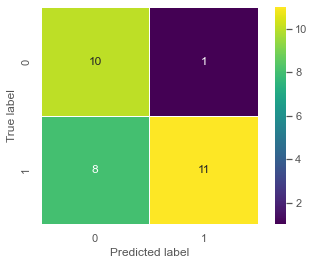

In [19]:
cm = confusion_matrix(y_test,rfc_pred)
sns.heatmap(cm, annot=True,fmt='g' ,linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [20]:
Xr = btc.drop(columns=['Trend','Close','Cum_Return'], axis=1)
yr = btc['Close']

In [21]:
Xr_train = Xr.iloc[0:len(X)-30, :]
Xr_test= Xr.iloc[len(X)-30: , :]
yr_train = yr.iloc[0:len(X)-30]
yr_test = yr.iloc[len(X)-30:]

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(Xr_train,yr_train)
rfr_pred = rfr.predict(Xr_test)

print('MAE: ',mean_absolute_error(yr_test, rfr_pred))
print('\n')
print('MSE: ',mean_squared_error(yr_test, rfr_pred))
print('\n')
print('RMSE: ',np.sqrt(mean_squared_error(yr_test, rfr_pred)))
print('\n')
print('R2:', r2_score(yr_test, rfr_pred))

MAE:  335.7827466666666


MSE:  252387.043898121


RMSE:  502.38137296094186


R2: 0.9914259304722106


In [23]:
test = pd.DataFrame()
test['True'] = yr_test
test['RFR'] = rfr_pred

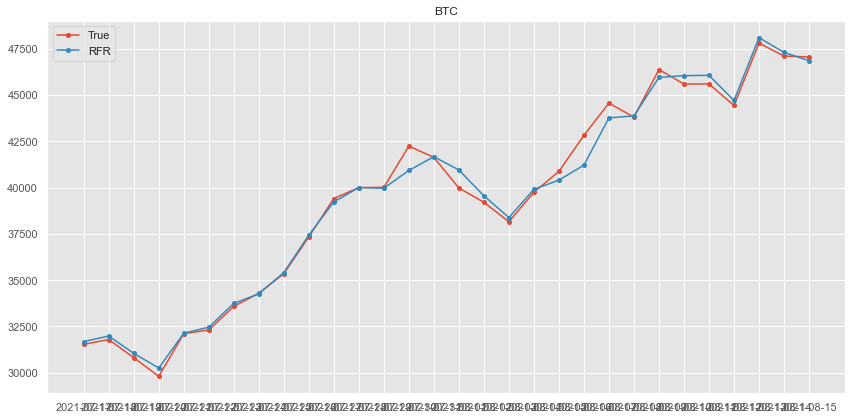

In [24]:
plt.figure(figsize=(12,6))
plt.plot('True', data=test, marker='o', ms=4 )
plt.plot('RFR', data=test, marker='o', ms=4)
plt.title('BTC')
plt.legend()
plt.tight_layout()

In [25]:
#import shap

#shap.initjs()
#shap_values = shap.TreeExplainer(rfr).shap_values(Xr_train)
#shap.summary_plot(shap_values, Xr_train, plot_type="bar")

In [26]:
#import shap

#shap.initjs()
#explainer = shap.TreeExplainer(rfr)
#shap_values_all = explainer.shap_values(Xr_test)
#shap.force_plot(explainer.expected_value, shap_values_all, Xr_test)

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer, ExplainerDashboard, ExplainerHub

In [29]:
#from dash_bootstrap_components.themes import CYBORG

In [30]:
explainer_r = RegressionExplainer(rfr, Xr_test, yr_test, X_background=Xr_train ,descriptions=feature_descriptions , 
                                  target='Close',units='$')

#ExplainerDashboard(explainer_r).run()

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model, X_background)


In [31]:
explainer_c = ClassifierExplainer(rfc, X_test, y_test, X_background=X_train,descriptions=feature_descriptions , 
                                  target='Trend', labels=['Down','Up'])


Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model, X_background)


In [32]:
#explainer_r.dump("explainer_r.joblib")

In [33]:
#explainerdashboard run explainer.joblib

In [34]:
#explainer_c = ClassifierExplainer(rfc, X_test, y_test)
#ExplainerDashboard(explainer_c).run()

In [43]:
db1 = ExplainerDashboard(explainer_c, title='Classifier Explainer')
db2 = ExplainerDashboard(explainer_r, title='Regression Explainer')
hub = ExplainerHub([db1, db2])
db1.to_yaml("dashboard.yaml", explainerfile="explainer.joblib", dump_explainer=True)
#hub.to_yaml("dashboard.yaml", dump_explainers=True)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


Using random SECRET_KEY: 4d9fad86-466c-4647-90b5-b8204bed5469, please set it on your app.config["SECRET_KEY"]


Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard1 and default description...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard2 and default description...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is runnin